# **Mengunggah Dataset**

In [1]:
from google.colab import files
import pandas as pd

# Mengunggah dataset
uploaded = files.upload()

# Membaca dataset CSV
data = pd.read_csv('Expenses1.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data = data.sort_values('Date')
data['Amount'] = data['Amount'] * 15926  # Konversi ke IDR

# Menyimpan dataset yang sudah diperbarui
data.to_csv("dataset_updated.csv", index=False)

# Menampilkan beberapa baris pertama data untuk memastikan
data.head()

Saving Expenses1.csv to Expenses1.csv


,Date,Item,Amount,Category,Time,day
0,NaT,chai,111482,alone,7:00,Wednesday
1,NaT,chai,318520,friend,10:00,Wednesday
2,NaT,juice,238890,friend,13:00,Wednesday
3,NaT,rikshow,191112,alone,14:00,Wednesday
4,NaT,coffee,191112,alone,15:00,Wednesday


# **Scaling dan Persiapan Data**

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Memilih kolom pengeluaran dan melakukan scaling
pengeluaran = data['Amount'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
pengeluaran_scaled = scaler.fit_transform(pengeluaran)

# Fungsi untuk membuat dataset dengan langkah waktu (n_steps)
def create_dataset(dataset, n_steps):
    X, y = [], []
    for i in range(len(dataset) - n_steps):
        X.append(dataset[i:i + n_steps])
        y.append(dataset[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3  # Menggunakan 3 bulan terakhir untuk prediksi
X, y = create_dataset(pengeluaran_scaled, n_steps)

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah bentuk data untuk input LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Menampilkan bentuk data yang telah dipersiapkan
X_train.shape, X_test.shape


((113, 3, 1), (29, 3, 1))

# **Membangun dan Melatih Model LSTM**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

# Membangun model LSTM
model = Sequential([
    Input(shape=(n_steps, 1)),
    LSTM(100, activation='tanh', return_sequences=True),
    LSTM(50, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Melatih model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=1)

# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f"Loss pada data uji: {loss}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0142 - val_loss: 0.0019
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - val_loss: 0.0019
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - val_loss: 0.0030
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0170 - val_loss: 0.0017
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0201 - val_loss: 0.0017
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0158 - val_loss: 0.0023
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - val_loss: 0.0021
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0272 - val_loss: 0.0017
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - val_loss: 0.0020
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - val_loss: 0.0025
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197 - val_loss: 0.0028
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

# **Menyimpan Model dan Scaler**

In [4]:
# Menyimpan model dalam format .h5
model.save('expense_prediction_model.h5')
print("Model telah disimpan dalam format .h5")

# Menyimpan scaler ke file pkl menggunakan joblib
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler telah disimpan dalam format .pkl")

Model telah disimpan dalam format .h5
Scaler telah disimpan dalam format .pkl


# **Prediksi & Visualisasi Grafik**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Prediksi pengeluaran bulan depan: 406792.4375


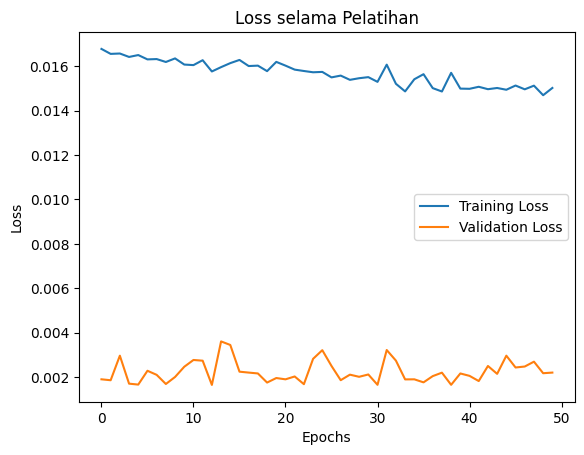

In [5]:
# Mengambil 3 bulan terakhir untuk prediksi
last_3_months = pengeluaran_scaled[-n_steps:]
last_3_months = last_3_months.reshape((1, n_steps, 1))  # Format input untuk LSTM

# Prediksi pengeluaran bulan depan
predicted = model.predict(last_3_months)
predicted_original = scaler.inverse_transform(predicted)  # Balik ke skala asli
print(f"Prediksi pengeluaran bulan depan: {predicted_original[0][0]}")

# Menampilkan grafik loss selama pelatihan
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss selama Pelatihan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Mengunduh Model dan Scaler**

In [6]:
# Mengunduh file model dan scaler
files.download('expense_prediction_model.h5')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>